In [1]:
!pip install tensorflow-cpu
!pip install pandas
# !pip install numpy
!pip install sklearn
!pip install joblib


  Using cached tensorflow_cpu-2.6.0-cp38-cp38-win_amd64.whl (235.4 MB)
  Using cached protobuf-3.17.3-cp38-cp38-win_amd64.whl (909 kB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Using cached google_auth-1.35.0-py2.py3-none-any.whl (152 kB)
  Using cached Werkzeug-2.0.1-py3-none-any.whl (288 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached cachetools-4.2.2-py3-none-any.whl (11 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)
  Using cached pandas-1.3.2-cp38-cp38-win_amd64.whl (10.2 MB)
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)


In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import joblib
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt

In [3]:
file_path = "./Kaggle_Data/songs.csv"

songs_df = pd.read_csv(file_path)

In [4]:
songs_df = songs_df[(songs_df['popularity'] > 20)]
songs_df = songs_df[(songs_df['year'] > 1959)]



songs_df.index = songs_df['id']
song_names = songs_df['name']
song_year = songs_df['year']
artists = songs_df['artists']
songs_df = songs_df.drop(columns=['id', 'name', 'release_date',
                                  'artists', 'popularity', 'duration_ms',
                                  'explicit'])

In [5]:
songs_df

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year
id,,,,,,,,,,,,
14KYHUXP10UdTx4RawPF65,0.5890,0.617,0.815,0.000366,4,0.1230,-8.724,1,0.0410,85.041,0.964,1960
67LQpgGMjI0jnXo9lRj07C,0.8920,0.596,0.314,0.000001,9,0.1680,-10.024,0,0.0290,99.442,0.599,1960
6punhea3aLO1amgBFe5Onz,0.6100,0.312,0.372,0.000000,5,0.3800,-9.472,1,0.0273,82.965,0.332,1960
7yjnEE3OeagYs8QI8cQYcH,0.8520,0.228,0.670,0.026900,6,0.1770,-9.893,0,0.0459,67.792,0.520,1960
1kQa6xtxhxrpLrCBgV5v7r,0.5580,0.476,0.923,0.000000,9,0.1570,-6.077,1,0.0850,90.129,0.808,1960
...,...,...,...,...,...,...,...,...,...,...,...,...
4KppkflX7I3vJQk7urOJaS,0.1730,0.875,0.443,0.000032,1,0.0891,-7.461,1,0.1430,100.012,0.306,2020
1ehhGlTvjtHo2e4xJFB0SZ,0.0167,0.719,0.385,0.031300,8,0.1110,-10.907,1,0.0403,128.000,0.270,2020
52eycxprLhK3lPcRLbQiVk,0.5380,0.514,0.539,0.002330,7,0.1080,-9.332,1,0.1050,123.700,0.153,2020


In [6]:
songs_array = songs_df.to_numpy()

In [7]:
songs_array.shape

(113126, 12)

In [8]:
max_val = 0
for x in songs_array:
    if x.max() > max_val:
        max_val = x.max()

songs_array_scaled = songs_array.astype('float')/max_val

In [9]:
songs_array_scaled.shape

(113126, 12)

In [10]:
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

nn.fit(songs_array_scaled)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10)

In [11]:
test_song = songs_array_scaled[1]

In [12]:
dist, index = nn.kneighbors(test_song.reshape(1,-1))

In [13]:
for i in index:
    print(song_names[i])

id
67LQpgGMjI0jnXo9lRj07C                             A Volta do Boêmio
6ImmlZj8ysK2jDnqqbKp60    Hello Mary Lou, Goodbye Heart - Remastered
69WjO90WyjR8HmoitIbkDz                                    Lumberjack
2ib1IMnHzjMtB7k6WkMcGv                                      Sad Mood
52K3t4o5i8akoXluiFzPTZ                       Working on the Building
7uF7JmOfHM38fuxlJ4lHBw                   Tutti Frutti (Tuti - Fruti)
2U95mnxcqpr394uCZncG4R                                          Amor
6KnopHJXnMgJfO3M7zVsRk                        I'll Say It's My Fault
25sKYXYcxPcGiOxJ4I4q4B         Samba De Una Nota So (One Note Samba)
7mzf1grnyOFo6BottE1Z18                       Stonewall Jackson's Way
Name: name, dtype: object


In [14]:
dist

array([[0.        , 0.00080544, 0.00090985, 0.00115341, 0.00138402,
        0.00140073, 0.0014407 , 0.00147914, 0.00148425, 0.00151149]])

In [15]:
joblib.dump(nn, filename='knn.gz', compress=3)

['knn.gz']

In [16]:
dist, index = nn.kneighbors(songs_array_scaled[:1000], 2)


In [17]:
dist = np.delete(dist, 0, axis=1)
y = np.array(list(range(0, 1000))).reshape(1000, 1)

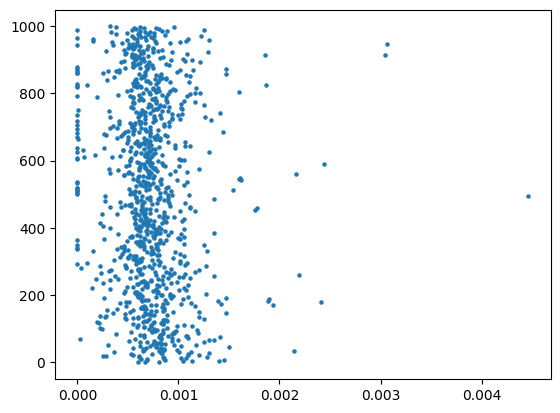

In [18]:
fig, ax = plt.subplots()

ax.scatter(dist, y, s=5)


plt.show()

In [8]:
inp = Input(shape=(11,))
            
# enc1 = Dense(6, activation='linear')(inp)
enc1 = Dense(1)(inp)

enc = Model(inp, enc1)

In [9]:
song_metrics = songs_df.drop(columns='year')
song_metrics = song_metrics.to_numpy()

In [10]:
enc_songs = enc.predict(song_metrics)

In [16]:
songs_metrics_year = np.stack((enc_songs, song_year.to_numpy().reshape(-1, 1)), axis=1).reshape(-1, 2)

In [17]:
songs_metrics_year

array([[ -21.62183952, 1960.        ],
       [ -24.01556587, 1960.        ],
       [ -20.87985992, 1960.        ],
       ...,
       [ -30.28425026, 2020.        ],
       [ -31.98987579, 2020.        ],
       [ -21.03937531, 2020.        ]])

In [18]:
nn_enc = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')

nn_enc.fit(songs_metrics_year)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10)

In [19]:
enc_test = songs_metrics_year[1]

dist_enc, index_enc = nn_enc.kneighbors(enc_test.reshape(1,-1))

In [20]:
for i in index_enc:
    print(song_names[i])

id
67LQpgGMjI0jnXo9lRj07C                                    A Volta do Boêmio
0KY3UEEB4Uf80uxD0ciUEv                                                  Why
1mFnzLmWAcuidKIapYMdyY                                      Tennessee Waltz
0lxZo8brQB2p9tCCOUoGmg    Quiero Ser Libre - I Want to be Free (Remaster...
1dGIHdI2bkAyALXNMQ3s2R                                      Make Me Know It
7uF7JmOfHM38fuxlJ4lHBw                          Tutti Frutti (Tuti - Fruti)
1wvf65y4bKpOfNKy7CDwOu                                   Nani Teri Morni Ko
4UGqFnfmdYwX1c3LB0n1Kd                     Come Rain Or Come Shine (Take 4)
0IGAYgRjnQkzpZ2eIe6fco                                 Souvenirs, souvenirs
0T3D4VoP2LSP1TemQBX7qV                              Come Rain Or Come Shine
Name: name, dtype: object


In [22]:
dist_enc, index_enc = nn_enc.kneighbors(songs_metrics_year[:1000], 2)


In [23]:
dist_enc = np.delete(dist_enc, 0, axis=1)
y = np.array(list(range(0, 1000))).reshape(1000, 1)

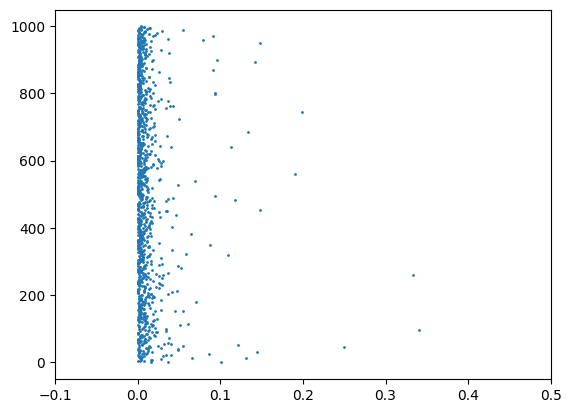

In [29]:
fig, ax = plt.subplots()

ax.scatter(dist_enc, y, s=1)
plt.xlim(-0.1, 0.5)

plt.show()